In [2]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Part 1

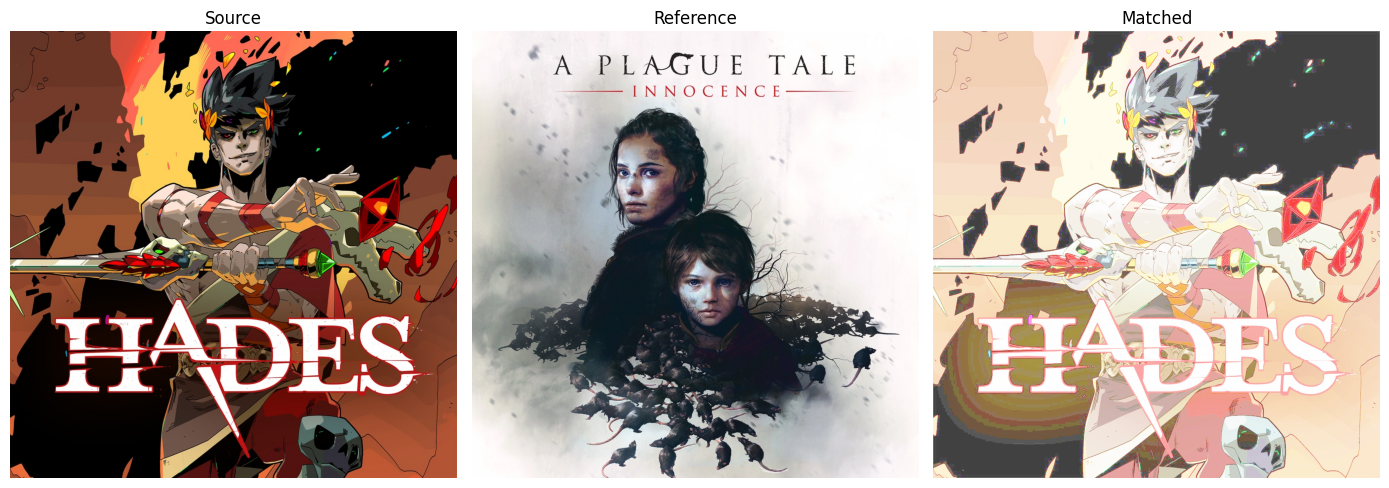

In [14]:
source =plt.imread('Hades.jpg')
reference = plt.imread('A Plague Tale.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference)

# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

# print(reference)

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched/255)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [56]:

def transform_image(image,transform):
    """
    transforms image pixels using the input transform
    """
    output_image = image.reshape((-1)).copy()

    for i in range(len(output_image)):
        output_image[i] = transform[output_image[i]] # replace pixels with new transform
    output_image = output_image.reshape(image.shape)
    
    return output_image

def hist_equ(image:np.ndarray,ret_transform=False):
    '''
    input:
    image (ndarray): input image
    ret_transform (bool): return the transform or the transformed image
    output:
    output_image (ndarray): enhanced image

    '''
    # get the histogram
    count=np.bincount(image.reshape((-1)))
    z = np.zeros((256),dtype=np.int)
    z[:len(count)] = count.copy()
    count = z.copy()

    # histogram equalization
    n = count.sum() # number of all pixels
    z = np.zeros((256),dtype=np.int32)
    z[0] = count[0]
    for i in range(1,256):
        z[i] = z[i-1]+count[i]

    output_t=(255/n *z) # new transform of pixels

    if ret_transform:
      return (output_t)

    output_image = transform_image(image,output_t)
    
    return output_image

def reverse_transform(transform:np.ndarray):
    """
    transform: a ndarray of zero dimension (shape:(n))
    """

    z = np.zeros(transform.shape,dtype=np.int32) 
    max_n=transform.shape[0]
    j=0
    t=0
    for i in range(len(z)):      
      while(j<max_n-1):
        if transform[j]<i:
          j+=1
        elif transform[j]==i:
          t=j
          if transform[j+1]==i:
            j+=1
          break
        
        elif transform[j] > i:
          t = (transform[j] + t)/2
          break
        
      z[i] = int(t)

    z[max_n-1] = max_n-1
    return z
    
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''
  
  ### YOUR CODE ###
  # START
  equ_source = hist_equ(src_image) # perform historgram equalization on source image
  ref_t = hist_equ(ref_image,True) # get the reference image histogram transform

  reverse_t = reverse_transform(ref_t)

  output_image = transform_image(equ_source,reverse_t)

  # END

  return output_image

C:\Users\Asus\AppData\Local\Temp\ipykernel_6776\382859823.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros((256),dtype=np.int)


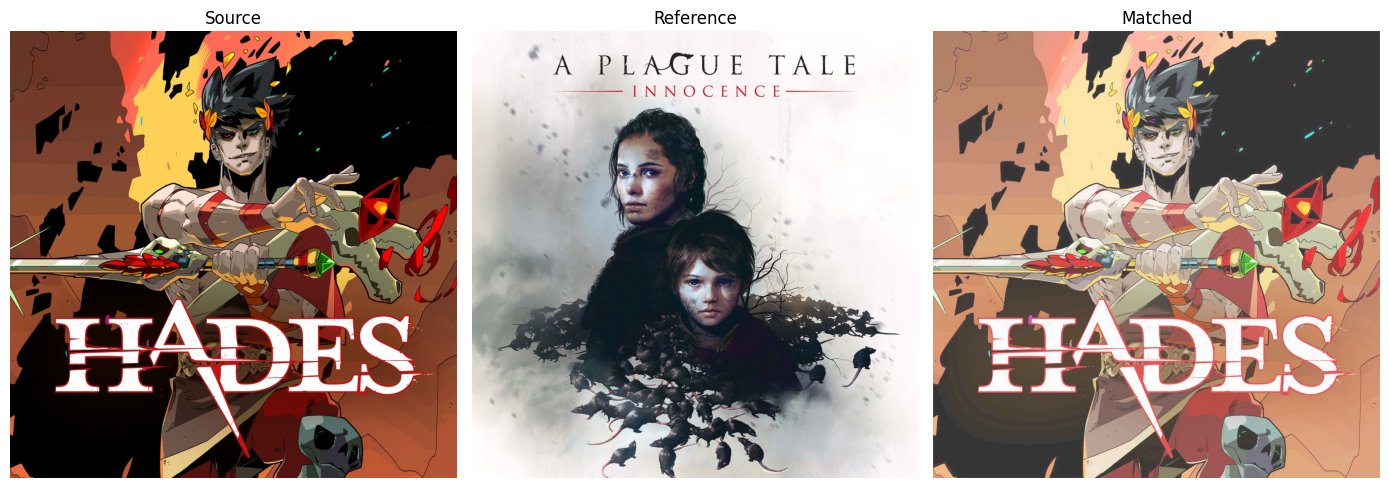

In [57]:
source =plt.imread('Hades.jpg')
reference = plt.imread('A Plague Tale.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source,reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

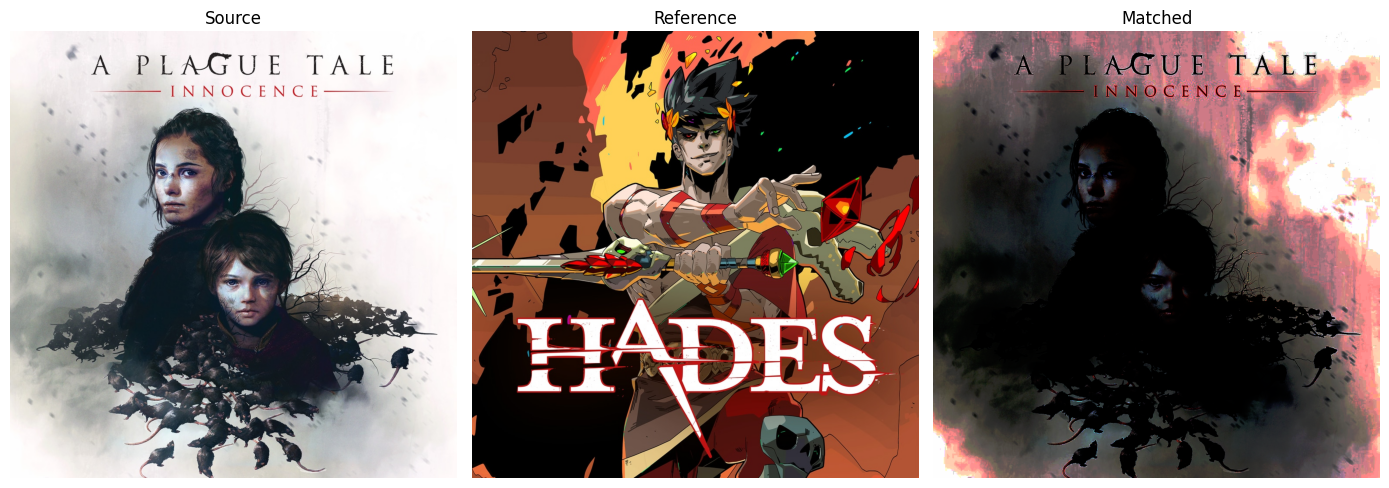

In [58]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference)
# END

# print(matched)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched/255)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6776\382859823.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros((256),dtype=np.int)


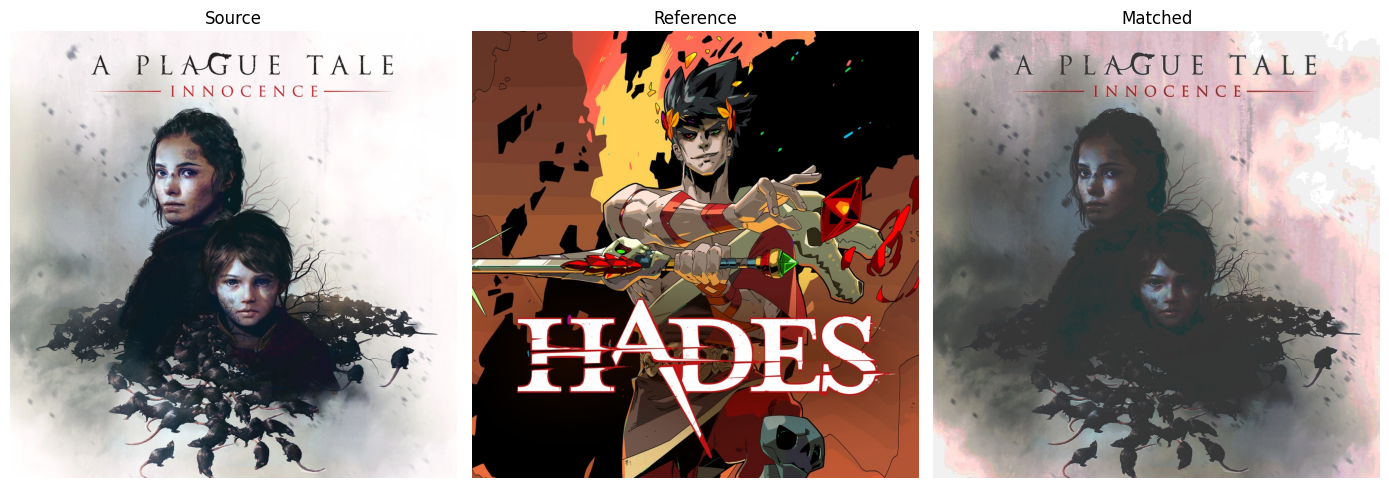

In [59]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source,reference)
# END

# print(matched)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()